In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

# 1. Read Data from JSON File

In [2]:
tr_data_json = json.load((open('../data/annotations/train.json')))
v_data_json = json.load((open('../data/annotations/val.json')))
te_data_json = json.load((open('../data/annotations/test.json')))

# 2. Create Dataframe

Create dataframes from training, validation, and test json files.

## 2.1 Dataset
### 2.1.1 Training

In [3]:
tr_imgs = tr_data_json['images']
tr_imgs_df = pd.DataFrame(tr_imgs)
tr_imgs_df.head(1)

,file_name,vizwiz_url,id,text_detected
0,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True


In [4]:
tr_imgs_df.rename(columns={'id': 'img_id', 'text_detected': 'img_txt_detected', 'vizwiz_url': 'img_url'}, inplace=True)
tr_imgs_df.head(1)

,file_name,img_url,img_id,img_txt_detected
0,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True


In [5]:
tr_captions = tr_data_json['annotations']
tr_captions_df = pd.DataFrame(tr_captions)
tr_captions_df.head(1)

,caption,image_id,is_precanned,is_rejected,id,text_detected
0,ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS T...,0,False,False,0,True


In [6]:
tr_captions_df.rename(columns={'text_detected': 'caption_txt_detected', 'image_id': 'img_id', 'id': 'caption_id'}, inplace=True)
tr_captions_df.head(1)

,caption,img_id,is_precanned,is_rejected,caption_id,caption_txt_detected
0,ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS T...,0,False,False,0,True


### 2.1.2 Validation

In [7]:
v_imgs = v_data_json['images']
v_imgs_df = pd.DataFrame(v_imgs)
v_imgs_df.rename(columns={'id': 'img_id', 'text_detected': 'img_txt_detected', 'vizwiz_url': 'img_url'}, inplace=True)
v_imgs_df.head(1)

,file_name,img_url,img_id,img_txt_detected
0,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True


In [8]:
v_captions = v_data_json['annotations']
v_captions_df = pd.DataFrame(v_captions)
v_captions_df.rename(columns={'text_detected': 'caption_txt_detected', 'image_id': 'img_id', 'id': 'caption_id'}, inplace=True)
v_captions_df.head(1)

,caption,img_id,is_precanned,is_rejected,caption_id,caption_txt_detected
0,A computer screen shows a repair prompt on the...,23431,False,False,117155,True


### 2.1.3 Test

In [9]:
te_imgs = te_data_json['images']
te_imgs_df = pd.DataFrame(te_imgs)
te_imgs_df.rename(columns={'id': 'img_id', 'text_detected': 'img_txt_detected', 'vizwiz_url': 'img_url'}, inplace=True)
te_imgs_df.head(1)

,file_name,img_url,img_id,img_txt_detected
0,VizWiz_test_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,31181,True


## 2.2 Summary

In [10]:
tr_imgs_info = ["Training", tr_imgs_df.shape[0], tr_imgs_df.columns.values] 
v_imgs_info = ["Validation", v_imgs_df.shape[0], v_imgs_df.columns.values]
te_imgs_info = ["Test", te_imgs_df.shape[0], te_imgs_df.columns.values]

imgs_data = [tr_imgs_info, v_imgs_info, te_imgs_info]
pd.DataFrame(imgs_data, columns=["Images Dataset", "Count", "Image Attributes"])

,Images Dataset,Count,Image Attributes
0,Training,23431,"[file_name, img_url, img_id, img_txt_detected]"
1,Validation,7750,"[file_name, img_url, img_id, img_txt_detected]"
2,Test,8000,"[file_name, img_url, img_id, img_txt_detected]"


Training dataset contains 23,431 images, validation dataset contains 7,750 images, and test dataset contains 8,000 images.

<b> Metadata of images dataset: </b>

- <b>img_id</b> <i>(type: int64)</i>: Image ID
- <b>file_name</b> <i>(type: str)</i>: Name of the image file
- <b>img_url</b> <i>(type: str)</i>: URL of the image
- <b>img_txt_detected</b> <i>(type: bool)</i>: Presence of text in the image

In [11]:
tr_captions_size_series = tr_captions_df.groupby('img_id').size()
tr_captions_min, tr_captions_max = tr_captions_size_series.agg(['min', 'max'])
tr_captions_per_img = 5 if tr_captions_min == 5 and tr_captions_max == 5 else np.nan

v_captions_size_series = v_captions_df.groupby('img_id').size()
v_captions_min, v_captions_max = v_captions_size_series.agg(['min', 'max'])
v_captions_per_img = 5 if tr_captions_min == 5 and tr_captions_max == 5 else np.nan

tr_captions_info = ["Training", tr_captions_df.shape[0], tr_captions_per_img, tr_captions_df.columns.values]
v_captions_info = ["Validation", v_captions_df.shape[0], v_captions_per_img, v_captions_df.columns.values]

captions_data = [tr_captions_info, v_captions_info]
pd.DataFrame(captions_data, columns=["Captions Dataset", "Count", "Captions Per Image", "Caption Attributes"])

,Captions Dataset,Count,Captions Per Image,Caption Attributes
0,Training,117155,5,"[caption, img_id, is_precanned, is_rejected, c..."
1,Validation,38750,5,"[caption, img_id, is_precanned, is_rejected, c..."


There are 117,155 captions in training dataset and 38,750 captions in validation dataset. Each image in training and validation dataset contains 5 captions.

<b> Metadata of captions dataset: </b>

- <b>caption_id</b> <i>(type: int64)</i>: Caption ID
- <b>img_id</b> <i>(type: int64)</i>: ID of the image that is associated with the caption.
- <b>caption</b> <i>(type: str)</i>: Caption of the image.
- <b>caption_txt_detected</b> <i>(type: bool)</i>: Caption contains paraphrased description of text present in the image.
- <b>is_precanned</b> <i>(type: bool)</i>: Contains the pre-canned text about insufficient quality images (“Quality issues are too severe…”). 
- <b>is_rejected</b> <i>(type: bool)</i>: Rejected caption.

# 3. Merge Dataframes

Create a single dataframe that combines the information of images and its annotations.

## 3.1 Dataset
### 3.1.1 Training

In [12]:
tr_merge_df = tr_imgs_df.merge(tr_captions_df, how='inner', on='img_id')
tr_merge_df.head(1)

,file_name,img_url,img_id,img_txt_detected,caption,is_precanned,is_rejected,caption_id,caption_txt_detected
0,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True,ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS T...,False,False,0,True


### 3.1.2 Validation

In [13]:
v_merge_df = v_imgs_df.merge(v_captions_df, how='inner', on='img_id')
v_merge_df.head(1)

,file_name,img_url,img_id,img_txt_detected,caption,is_precanned,is_rejected,caption_id,caption_txt_detected
0,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True,A computer screen shows a repair prompt on the...,False,False,117155,True


# 4. Filter Data

Delete captions that do not describe image properly.

## 4.1 Dataset
### 4.1.1 Training

In [14]:
tr_not_precanned_df = tr_merge_df.query('is_precanned == False')
tr_not_rejected_df = tr_not_precanned_df.query('is_rejected == False')
tr_captionable_df = tr_not_rejected_df[~tr_not_rejected_df.caption.str.contains('Quality issues are too severe', case=False)]
tr_captionable_df.shape

(100491, 9)

### 3.1.2 Validation

In [15]:
v_not_precanned_df = v_merge_df.query('is_precanned == False')
v_not_rejected_df = v_not_precanned_df.query('is_rejected == False')
v_captionable_df = v_not_rejected_df[~v_not_rejected_df.caption.str.contains('Quality issues are too severe', case=False)]
v_captionable_df.shape

(33113, 9)

## 5. Data Analysis

## 5.1 Images and captions count
Filtered dataset contains at least 1 and at most 5 captions per image. Find how many images have 5 captions, 4 captions, and so on.

### 5.1.1 Training

In [16]:
tr_captions_count_per_image_series = tr_captionable_df['img_id'].value_counts()

tr_captions_count_per_image_df = pd.DataFrame(tr_captions_count_per_image_series)
tr_captions_count_per_image_df = tr_captions_count_per_image_df.reset_index()
tr_captions_count_per_image_df.columns = ['img_id', 'captions_count']
tr_captions_count_per_image_df.head(1)

,img_id,captions_count
0,2047,5


In [17]:
tr_total_images_per_captions_count_series = tr_captions_count_per_image_df['captions_count'].value_counts()

tr_total_images_per_captions_count_df = pd.DataFrame(tr_total_images_per_captions_count_series)
tr_total_images_per_captions_count_df = tr_total_images_per_captions_count_df.reset_index()
tr_total_images_per_captions_count_df.columns = ['captions_count', 'total_images']
tr_total_images_per_captions_count_df

,captions_count,total_images
0,5,14782
1,4,4773
2,3,1653
3,2,908
4,1,714


### 5.1.2 Validation

In [18]:
v_captions_count_per_image_series = v_captionable_df['img_id'].value_counts()

v_captions_count_per_image_df = pd.DataFrame(v_captions_count_per_image_series)
v_captions_count_per_image_df = v_captions_count_per_image_df.reset_index()
v_captions_count_per_image_df.columns = ['img_id', 'captions_count']
v_captions_count_per_image_df.head(1)

,img_id,captions_count
0,30657,5


In [19]:
v_total_images_per_captions_count_series = v_captions_count_per_image_df['captions_count'].value_counts()

v_total_images_per_captions_count_df = pd.DataFrame(v_total_images_per_captions_count_series)
v_total_images_per_captions_count_df = v_total_images_per_captions_count_df.reset_index()
v_total_images_per_captions_count_df.columns = ['captions_count', 'total_images']
v_total_images_per_captions_count_df

,captions_count,total_images
0,5,4917
1,4,1517
2,3,538
3,2,287
4,1,272


## 5.2 Text detected in images

### 5.2.1 Training

In [20]:
tr_unique_images_df = tr_captionable_df.drop_duplicates(subset='img_id')
tr_txt_images_count = tr_unique_images_df.query('img_txt_detected == True').shape[0]
tr_no_txt_images_count = tr_unique_images_df.query('img_txt_detected == False').shape[0]
print(f'Training dataset has {tr_txt_images_count} images that contain text and {tr_no_txt_images_count} images that do not contain text.')

Training dataset has 14684 images that contain text and 8146 images that do not contain text.


### 5.2.2 Validation

In [21]:
v_unique_images_df = v_captionable_df.drop_duplicates(subset='img_id')
v_txt_images_count = v_unique_images_df.query('img_txt_detected == True').shape[0]
v_no_txt_images_count = v_unique_images_df.query('img_txt_detected == False').shape[0]
print(f'Validation dataset has {v_txt_images_count} images that contain text and {v_no_txt_images_count} images that do not contain text.')

Validation dataset has 5008 images that contain text and 2523 images that do not contain text.


### 5.2.3 Test

In [22]:
te_txt_images_count = te_imgs_df.query('img_txt_detected == True').shape[0]
te_no_txt_images_count = te_imgs_df.query('img_txt_detected == False').shape[0]
print(f'Test dataset has {v_txt_images_count} images that contain text and {v_no_txt_images_count} images that do not contain text.')

Test dataset has 5008 images that contain text and 2523 images that do not contain text.


## 5.3 How many captions describes text in the images?

### 5.3.1 Training

<b> a) Find images with text</b>

In [23]:
tr_imgs_with_txt_df = tr_captionable_df.query('img_txt_detected == True')
tr_imgs_with_txt_df.head(1)

,file_name,img_url,img_id,img_txt_detected,caption,is_precanned,is_rejected,caption_id,caption_txt_detected
0,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True,ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS T...,False,False,0,True


<b> 2) Find the number of captions that describes text in images </b>

In [24]:
tr_caption_with_txt_des_df = tr_captionable_df.query('caption_txt_detected == True')

tr_caption_txt_detected_df = tr_caption_with_txt_des_df.groupby('img_id').size().to_frame('caption_txt_detected')
tr_caption_txt_detected_df.head(1)

,caption_txt_detected
img_id,
0,4


<b> 3) Find the number of captions that do not describe text present in the image </b>

In [25]:
tr_caption_no_txt_des_df = tr_imgs_with_txt_df.query('caption_txt_detected == False')

tr_caption_txt_not_detected_df = tr_caption_no_txt_des_df.groupby('img_id').size().to_frame('caption_txt_not_detected')
tr_caption_txt_not_detected_df.head(1)

,caption_txt_not_detected
img_id,
3,1


<b> 4) Find the total number of "text detected" and "text not detected" captions per image <b>

In [26]:
tr_caption_txt_detected_df['caption_txt_not_detected'] = tr_caption_txt_not_detected_df['caption_txt_not_detected']
tr_caption_txt_detected_df.fillna(0, inplace=True)
tr_caption_txt_detected_df = tr_caption_txt_detected_df.astype({'caption_txt_not_detected': 'int32'})
tr_caption_txt_detected_df.head(1)

,caption_txt_detected,caption_txt_not_detected
img_id,,
0,4,0


<b> 5) Find the number of images with two classification of captions </b>

In [27]:
tr_caption_classify_grp = tr_caption_txt_detected_df.groupby(['caption_txt_detected', 'caption_txt_not_detected'])
tr_caption_classify_dp = tr_caption_classify_grp.size().to_frame('images_count')
tr_caption_classify_dp.head(12)

images_count
caption_txt_detected caption_txt_not_detected              
1                    0                                 1062
                     1                                   32
                     2                                   12
2                    0                                  809
                     1                                  118
                     2                                  104
3                    0                                  682
                     1                                  511
                     2                                  578
4                    0                                 2383
                     1                                 1631
5                    0                                 8339

### 5.3.2 Validation

<b> 1) Find images with text </b>

In [28]:
v_imgs_with_txt_df = v_captionable_df.query('img_txt_detected == True')
v_imgs_with_txt_df.head(1)

,file_name,img_url,img_id,img_txt_detected,caption,is_precanned,is_rejected,caption_id,caption_txt_detected
0,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True,A computer screen shows a repair prompt on the...,False,False,117155,True


<b> 2) Find the number of captions that describes text in images </b>

In [29]:
v_caption_with_txt_des_df = v_captionable_df.query('caption_txt_detected == True')

v_caption_txt_detected_df = v_caption_with_txt_des_df.groupby('img_id').size().to_frame('caption_txt_detected')
v_caption_txt_detected_df.head(1)

,caption_txt_detected
img_id,
23431,5


<b> 3) Find the number of captions that do not describe text present in the image </b>

In [30]:
v_caption_no_txt_des_df = v_imgs_with_txt_df.query('caption_txt_detected == False')

v_caption_txt_not_detected_df = v_caption_no_txt_des_df.groupby('img_id').size().to_frame('caption_txt_not_detected')
v_caption_txt_not_detected_df.head(1)

,caption_txt_not_detected
img_id,
23436,1


<b> 4) Find the total number of "text detected" and "text not detected" captions per image </b>

In [31]:
v_caption_txt_detected_df['caption_txt_not_detected'] = v_caption_txt_not_detected_df['caption_txt_not_detected']
v_caption_txt_detected_df.fillna(0, inplace=True)
v_caption_txt_detected_df = v_caption_txt_detected_df.astype({'caption_txt_not_detected': 'int32'})
v_caption_txt_detected_df.head(1)

,caption_txt_detected,caption_txt_not_detected
img_id,,
23431,5,0


<b> 5) Find the number of images with two classification of captions </b>

In [32]:
v_caption_classify_grp = v_caption_txt_detected_df.groupby(['caption_txt_detected', 'caption_txt_not_detected'])
v_caption_classify_dp = v_caption_classify_grp.size().to_frame('images_count')
v_caption_classify_dp.head(12)

images_count
caption_txt_detected caption_txt_not_detected              
1                    0                                  345
                     1                                    9
                     2                                    3
2                    0                                  289
                     1                                   41
                     2                                   31
3                    0                                  222
                     1                                  174
                     2                                  207
4                    0                                  767
                     1                                  561
5                    0                                 2882

# 6. Data Visualization

## 6.1 No. of images per captions count

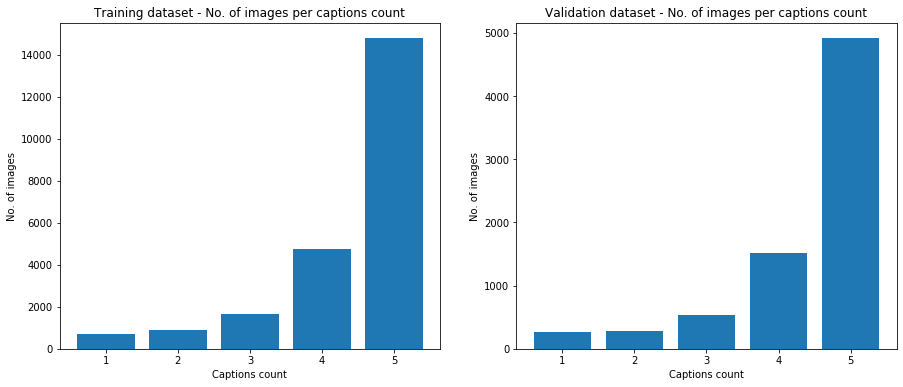

In [33]:
figure(num=None, figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(tr_total_images_per_captions_count_df.captions_count, tr_total_images_per_captions_count_df.total_images)
plt.title('Training dataset - No. of images per captions count')
plt.xlabel("Captions count")
plt.ylabel("No. of images")

plt.subplot(1, 2, 2)
plt.bar(v_total_images_per_captions_count_df.captions_count, v_total_images_per_captions_count_df.total_images)
plt.title('Validation dataset - No. of images per captions count')
plt.xlabel("Captions count")
plt.ylabel("No. of images")

plt.show()

## 6.2 Text detected in images

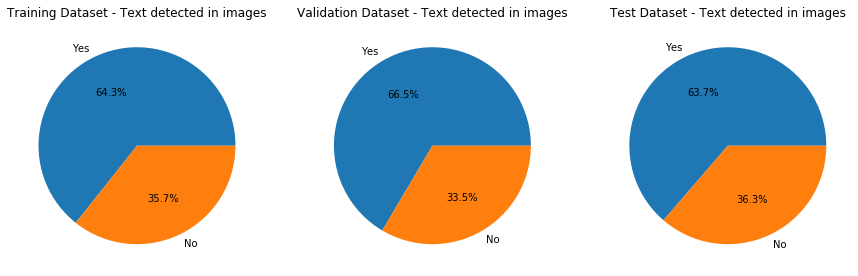

In [34]:
figure(num=None, figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.pie([tr_txt_images_count, tr_no_txt_images_count], labels=['Yes', 'No'],
       autopct='%1.1f%%')
plt.title('Training Dataset - Text detected in images');

plt.subplot(1, 3, 2)
plt.pie([v_txt_images_count, v_no_txt_images_count], labels=['Yes', 'No'],
       autopct='%1.1f%%')
plt.title('Validation Dataset - Text detected in images');

plt.subplot(1, 3, 3)
plt.pie([te_txt_images_count, te_no_txt_images_count], labels=['Yes', 'No'],
       autopct='%1.1f%%')
plt.title('Test Dataset - Text detected in images');

plt.show()

## 6.3 How many captions describe text in the images?

### 6.3.1 Training

In [35]:
tr_caption_classify_unstack_dp = tr_caption_classify_dp.unstack()
tr_caption_classify_unstack_dp.head()

images_count               
caption_txt_not_detected            0       1      2
caption_txt_detected                                
1                              1062.0    32.0   12.0
2                               809.0   118.0  104.0
3                               682.0   511.0  578.0
4                              2383.0  1631.0    NaN
5                              8339.0     NaN    NaN

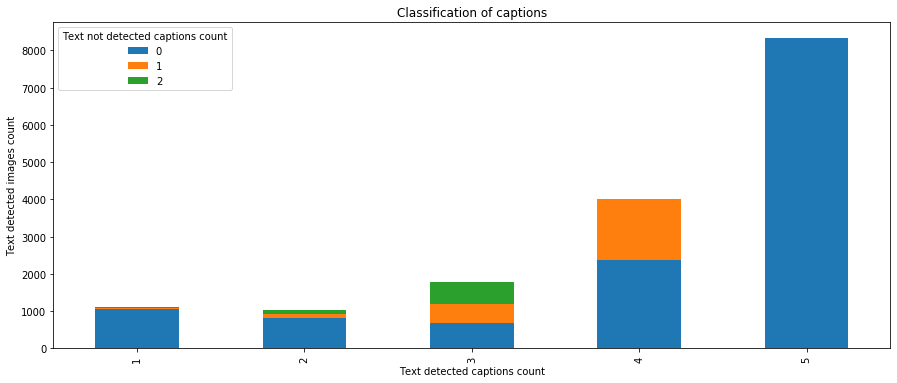

In [36]:
ax = tr_caption_classify_unstack_dp.plot(kind='bar', use_index=True, figsize=(15, 6), stacked=True)
ax.legend(['0', '1', '2'], title="Text not detected captions count");
ax.set_title('Classification of captions');
ax.set_xlabel('Text detected captions count');
ax.set_ylabel('Text detected images count');

### 6.3.2 Validation

In [37]:
v_caption_classify_unstack_dp = v_caption_classify_dp.unstack()
v_caption_classify_unstack_dp.head()

images_count              
caption_txt_not_detected            0      1      2
caption_txt_detected                               
1                               345.0    9.0    3.0
2                               289.0   41.0   31.0
3                               222.0  174.0  207.0
4                               767.0  561.0    NaN
5                              2882.0    NaN    NaN

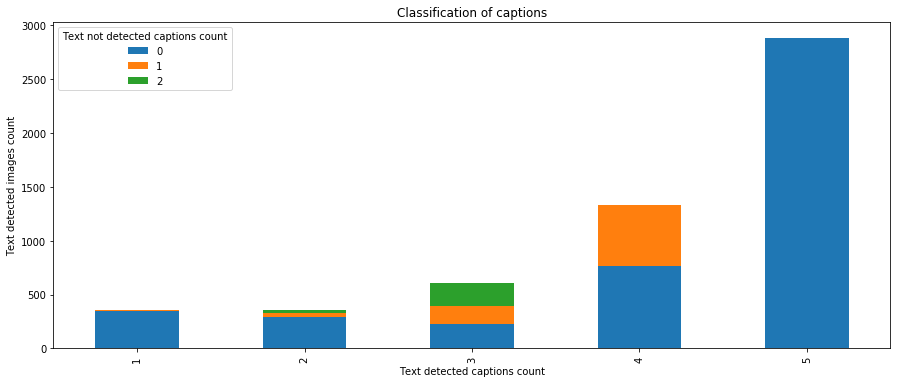

In [38]:
ax = v_caption_classify_unstack_dp.plot(kind='bar', use_index=True, figsize=(15, 6), stacked=True)
ax.legend(['0', '1', '2'], title="Text not detected captions count");
ax.set_title('Classification of captions');
ax.set_xlabel('Text detected captions count');
ax.set_ylabel('Text detected images count');

# 7. Exclude low quality images and its captions

In order to exclude low quality images and ensure each image has 5 captions, any images containing less than 5 captions are removed from the final dataset.

## 7.1 Training

In [39]:
headers = ['img_id', 'img_url', 'caption', 'img_txt_detected', 'caption_txt_detected']

In [ ]:
tr_indexes_should_drop = tr_captionable_df.groupby('img_id').filter(lambda x: (x.shape[0] < 5)).index
tr_result = tr_captionable_df.drop(index=tr_indexes_should_drop)
tr_result.to_csv(r'../data/output/tr_data.csv', columns=headers, index=False)

## 7.2 Validation

In [ ]:
v_indexes_should_drop = v_captionable_df.groupby('img_id').filter(lambda x: (x.shape[0] < 5)).index
v_result = v_captionable_df.drop(index=v_indexes_should_drop)
v_result.to_csv(r'../data/output/v_data.csv', columns=headers, index=False)